In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily  as ctx
import seaborn as sns

In [2]:
#conda install -c conda-forge contextily

## Datasets utilizados

In [3]:
#Tiene 7413 filas, la 2° columna son todos los circuitos de CABA. 
rosetta=pd.read_csv("https://raw.githubusercontent.com/MET4OP-UBA/MET4OP/master/dataset/elecciones_2019/rosetta.csv")
rosetta

,CODIGO_MESA_2019,CODIGO_CIRCUITO_2017
0,0100100001X,1001000001
1,0100100002X,1001000001
2,0100100003X,1001000001
3,0100100004X,1001000001
4,0100100005X,1001000001
...,...,...
7408,0101507409X,1015000167
7409,0101507410X,1015000167
7410,0101507411X,1015000167
7411,0101507412X,1015000167


In [4]:
#CSV de resultados electorales
df= pd.read_csv("https://raw.githubusercontent.com/MET4OP-UBA/MET4OP/master/dataset/elecciones_2019/resultados/120819-054029/datos_agrup.csv")

In [5]:
#shp de CABA que esta dentro de la carpeta de elecciones 2019, tiene la geometría de los circuitos, nada más. 
#167 filas
caba_circuitos= gpd.read_file("C:/Users/W10/OneDrive/Escritorio/2° Cuatri/Metodologia de la OP/Clonados/MET4OP/dataset/elecciones_2019/CABA.shp")


In [6]:
#Este es el shp de CABA del  censo 2010, es el de RADIOS CENSALES.
caba_radios_censales=gpd.read_file("C:/Users/W10/OneDrive/Escritorio/2° Cuatri/Metodologia de la OP/Clonados/MET4OP/dataset/censo2010/radios_censales/Codgeo_CABA_con_datos/cabaxrdatos.shp")


In [7]:
#DE LA CARPETA LABELS
nbi=pd.read_csv("C:/Users/W10/OneDrive/Escritorio/2° Cuatri/Metodologia de la OP/Clonados/MET4OP/dataset/censo2010/Labels/HOGAR-ALGUNBI-LABELS.CSV", sep=";")
nbi.head()

,ALGUNBI,label
0,0,Hogares sin NBI
1,1,Hogares con NBI
2,3,MISSING
3,2,NOTAPPLICABLE


### Datasets del ZIP del censo

In [8]:
# (24, 5) tiene los id de las provincias.
prov=pd.read_csv("C:/Users/W10/OneDrive/Escritorio/2° Cuatri/Metodologia de la OP/Clonados/MET4OP/dataset/censo2010/prov.csv")


In [9]:
#Tiene 15 filas con los id de  las comunas.
dpto=pd.read_csv("C:/Users/W10/OneDrive/Escritorio/2° Cuatri/Metodologia de la OP/Clonados/MET4OP/dataset/censo2010/dpto.csv")


In [10]:
#Tiene 351 filas.
frac=pd.read_csv("C:/Users/W10/OneDrive/Escritorio/2° Cuatri/Metodologia de la OP/Clonados/MET4OP/dataset/censo2010/frac.csv")


In [11]:
# (3552, 3)
radio=pd.read_csv("C:/Users/W10/OneDrive/Escritorio/2° Cuatri/Metodologia de la OP/Clonados/MET4OP/dataset/censo2010/radio.csv")


In [12]:
#(1085463, 13)
vivienda=pd.read_csv("C:/Users/W10/OneDrive/Escritorio/2° Cuatri/Metodologia de la OP/Clonados/MET4OP/dataset/censo2010/vivienda.csv")


In [13]:
#Me quedo con las columnas que me sirven
hogar=pd.read_csv("C:/Users/W10/OneDrive/Escritorio/2° Cuatri/Metodologia de la OP/Clonados/MET4OP/dataset/censo2010/hogar.csv")
hogar_limpio= hogar.loc[:,["HOGAR_REF_ID","VIVIENDA_REF_ID", "ALGUNBI"]]
hogar_limpio

,HOGAR_REF_ID,VIVIENDA_REF_ID,ALGUNBI
0,1,1,0
1,2,1,0
2,3,1,0
3,4,1,1
4,5,2,1
...,...,...,...
1152594,1152595,1426434,0
1152595,1152596,1426435,0
1152596,1152597,1426436,0
1152597,1152598,1426437,2


# Introducción

## Resultados por comuna

Para repasar la situación de la fórmula presidencial del Frente de Todos, retomamos los resultados por comuna.

In [14]:
#POLÍGONO DE COMUNAS, NO ESTÁ EN CARPETA DE REPO
comunas_ = gpd.read_file("C:/Users/W10/OneDrive/Escritorio/comunas/comunas_wgs84.shp")

#Me quedo con columnas que me sirven
comunas_= comunas_.loc[:,["COMUNAS", "geometry"]] 

In [15]:
#Dataframe con datos presidenciales
df_presidencial= df.loc[df.NOMBRE_CATEGORIA == "Presidente y Vicepresidente de la República"]
#Votos totales por partido
total=df_presidencial.groupby("NOMBRE_AGRUPACION", as_index=False)["VOTOS_AGRUPACION"].sum().sort_values("VOTOS_AGRUPACION", ascending=False).reset_index(drop=True)
total['Porcentaje'] = (total['VOTOS_AGRUPACION'] / total['VOTOS_AGRUPACION'].sum()) * 100

In [16]:
#Agrupamos por comunas
df_comuna=df_presidencial.groupby(["NOMBRE_REGION", "NOMBRE_AGRUPACION"], as_index=False)["VOTOS_AGRUPACION"].sum()

#Abreviamos algunos nombres por prolijidad.
cambio_nombres=df_comuna.replace({"FRENTE DE TODOS": "FdT",
                                           "FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD": "FIT",
                                           "JUNTOS POR EL CAMBIO": "JxC",
                                           "FRENTE NOS":"NOS",
                                          "UNITE POR LA LIBERTAD Y LA DIGNIDAD":"UNITE"})
comuna_final=pd.DataFrame(data=cambio_nombres) 
comuna_final

,NOMBRE_REGION,NOMBRE_AGRUPACION,VOTOS_AGRUPACION
0,COMUNA 01,BLANCO,3674
1,COMUNA 01,CONSENSO FEDERAL,8305
2,COMUNA 01,FIT,4368
3,COMUNA 01,FdT,42299
4,COMUNA 01,NOS,1763
...,...,...,...
205,COMUNA 15,MOVIMIENTO DE ACCION VECINAL,159
206,COMUNA 15,NULO,1358
207,COMUNA 15,PARTIDO AUTONOMISTA,125
208,COMUNA 15,RECURRIDO,61


In [17]:
#Para obtener resultados absolutos
resultados_absolutos=comuna_final.loc[comuna_final.NOMBRE_AGRUPACION == "FdT"].sort_values(by="NOMBRE_REGION", ascending=True)
resultados_absolutos

#Como quiero mergear con tabla de geometrías, debo tener una columna en común. En este caso será la de COMUNA pero primero debemos acomodarla.
# Selecciono ultimos 2 digitos que corresponden al número de comuna.
resultados_absolutos["NOMBRE_REGION"] = resultados_absolutos["NOMBRE_REGION"].str[-2:] # selecciono ultimos 3 digitos que son los del circuito
#Convierto comuna a columna numérica.
resultados_absolutos["NOMBRE_REGION"] =pd.to_numeric(resultados_absolutos["NOMBRE_REGION"], downcast="integer")
resultados_absolutos

,NOMBRE_REGION,NOMBRE_AGRUPACION,VOTOS_AGRUPACION
3,1,FdT,42299
17,2,FdT,19615
31,3,FdT,43139
45,4,FdT,57837
59,5,FdT,43785
73,6,FdT,38548
87,7,FdT,47901
101,8,FdT,51803
115,9,FdT,44797
129,10,FdT,40478


In [18]:
#Lo mismo se hizo con la columna de comunas del shape.
comunas_['COMUNAS'] = pd.to_numeric(comunas_['COMUNAS'],downcast="integer")
comunas_

,COMUNAS,geometry
0,2,"POLYGON ((-58.38000 -34.57002, -58.38002 -34.5..."
1,6,"POLYGON ((-58.43061 -34.60705, -58.43056 -34.6..."
2,10,"POLYGON ((-58.48834 -34.62016, -58.48820 -34.6..."
3,11,"POLYGON ((-58.49838 -34.59637, -58.49718 -34.5..."
4,12,"POLYGON ((-58.50331 -34.59386, -58.50347 -34.5..."
5,14,"POLYGON ((-58.42676 -34.55202, -58.42676 -34.5..."
6,15,"POLYGON ((-58.42602 -34.59661, -58.42484 -34.5..."
7,13,"POLYGON ((-58.44033 -34.54022, -58.44032 -34.5..."
8,4,"POLYGON ((-58.38864 -34.63373, -58.38864 -34.6..."
9,5,"POLYGON ((-58.43333 -34.60267, -58.43314 -34.6..."


In [19]:
#Merge entre resultados del FdT y la geometría por comuna.
votos_comuna=pd.merge(comunas_, resultados_absolutos, left_on="COMUNAS", right_on="NOMBRE_REGION")
votos_comuna

,COMUNAS,geometry,NOMBRE_REGION,NOMBRE_AGRUPACION,VOTOS_AGRUPACION
0,2,"POLYGON ((-58.38000 -34.57002, -58.38002 -34.5...",2,FdT,19615
1,6,"POLYGON ((-58.43061 -34.60705, -58.43056 -34.6...",6,FdT,38548
2,10,"POLYGON ((-58.48834 -34.62016, -58.48820 -34.6...",10,FdT,40478
3,11,"POLYGON ((-58.49838 -34.59637, -58.49718 -34.5...",11,FdT,42788
4,12,"POLYGON ((-58.50331 -34.59386, -58.50347 -34.5...",12,FdT,45793
5,14,"POLYGON ((-58.42676 -34.55202, -58.42676 -34.5...",14,FdT,35605
6,15,"POLYGON ((-58.42602 -34.59661, -58.42484 -34.5...",15,FdT,47133
7,13,"POLYGON ((-58.44033 -34.54022, -58.44032 -34.5...",13,FdT,36370
8,4,"POLYGON ((-58.38864 -34.63373, -58.38864 -34.6...",4,FdT,57837
9,5,"POLYGON ((-58.43333 -34.60267, -58.43314 -34.6...",5,FdT,43785


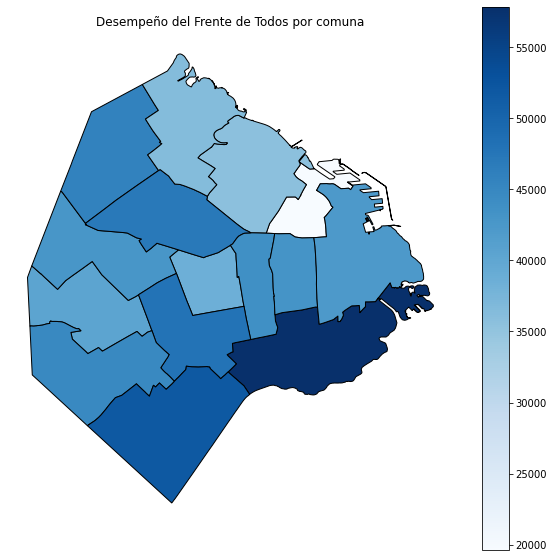

In [20]:
#Mapa por comuna
mapa_comunas=votos_comuna.plot(column="VOTOS_AGRUPACION",cmap='Blues', figsize=(10, 10), edgecolor='black', legend=True)
mapa_comunas.axis("off")
mapa_comunas.set_title("Desempeño del Frente de Todos por comuna")
plt.show()

En el análisis por comunas, habíamos visto cómo el Frente de Todos logró un mejor desempeño en las comunas del sur, sobre todo en  las Comunas 4 y 8. Los peores resultados estaban ubicados en las comunas del norte (la 2, 13 y 14), mientras que las demas habian mostrado un caudal de votos bastante uniforme. 

# Parte 2 

## Análisis de resultados por circuito

In [21]:
#Agrupo por codigo de circuito y partido, asi me quedan resultados por circuito y puedo mergear con el shape de circuitos.
resultado_x_circuito= df_presidencial.groupby(["CODIGO_CIRCUITO", "NOMBRE_AGRUPACION"], as_index=False)["VOTOS_AGRUPACION"].sum()

#Para mergear necesito que tengan columna en común, entonces voy a limpiarlas.
#Convierto en string para poder seleccionar ultimos digitos, ademas en el shape estan en string.
resultado_x_circuito["CODIGO_CIRCUITO"] =resultado_x_circuito["CODIGO_CIRCUITO"].apply(str) 
#Me quedo solo con los ultimos 4 numeros
resultado_x_circuito["CODIGO_CIRCUITO"] = resultado_x_circuito["CODIGO_CIRCUITO"].str[-4:] 
#Saco porcentajes de cada partido por circuito
resultado_x_circuito["Porcentaje"]=100 * resultado_x_circuito['VOTOS_AGRUPACION'] / resultado_x_circuito.groupby('CODIGO_CIRCUITO')['VOTOS_AGRUPACION'].transform('sum')

resultado_x_circuito

,CODIGO_CIRCUITO,NOMBRE_AGRUPACION,VOTOS_AGRUPACION,Porcentaje
0,0001,BLANCO,215,3.012470
1,0001,CONSENSO FEDERAL,483,6.767549
2,0001,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,343,4.805941
3,0001,FRENTE DE TODOS,3002,42.062491
4,0001,FRENTE NOS,75,1.050862
...,...,...,...,...
2319,0167,MOVIMIENTO DE ACCION VECINAL,6,0.057040
2320,0167,NULO,112,1.064740
2321,0167,PARTIDO AUTONOMISTA,5,0.047533
2322,0167,RECURRIDO,4,0.038026


In [22]:
#Hago merge entre resultados de elecciones con el shape de circuitos 
temp=pd.merge(caba_circuitos, resultado_x_circuito, left_on="circuito", right_on="CODIGO_CIRCUITO")
df_circuitos_resultados=temp.loc[:, ["circuito", "geometry", "NOMBRE_AGRUPACION", "VOTOS_AGRUPACION"]]
df_circuitos_resultados


,circuito,geometry,NOMBRE_AGRUPACION,VOTOS_AGRUPACION
0,0003,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -...",BLANCO,42
1,0003,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -...",CONSENSO FEDERAL,181
2,0003,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -...",FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,31
3,0003,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -...",FRENTE DE TODOS,466
4,0003,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -...",FRENTE NOS,25
...,...,...,...,...
2319,0088,"POLYGON Z ((-6509495.834 -4096454.887 0.000, -...",MOVIMIENTO DE ACCION VECINAL,22
2320,0088,"POLYGON Z ((-6509495.834 -4096454.887 0.000, -...",NULO,182
2321,0088,"POLYGON Z ((-6509495.834 -4096454.887 0.000, -...",PARTIDO AUTONOMISTA,19
2322,0088,"POLYGON Z ((-6509495.834 -4096454.887 0.000, -...",RECURRIDO,0


In [23]:
#Saco porcentajes de cada partido por circuito
df_circuitos_resultados["Porcentaje"]=100 * df_circuitos_resultados['VOTOS_AGRUPACION'] / df_circuitos_resultados.groupby('circuito')['VOTOS_AGRUPACION'].transform('sum')
df_circuitos_resultados

,circuito,geometry,NOMBRE_AGRUPACION,VOTOS_AGRUPACION,Porcentaje
0,0003,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -...",BLANCO,42,1.243707
1,0003,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -...",CONSENSO FEDERAL,181,5.359787
2,0003,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -...",FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,31,0.917975
3,0003,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -...",FRENTE DE TODOS,466,13.799230
4,0003,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -...",FRENTE NOS,25,0.740302
...,...,...,...,...,...
2319,0088,"POLYGON Z ((-6509495.834 -4096454.887 0.000, -...",MOVIMIENTO DE ACCION VECINAL,22,0.167734
2320,0088,"POLYGON Z ((-6509495.834 -4096454.887 0.000, -...",NULO,182,1.387618
2321,0088,"POLYGON Z ((-6509495.834 -4096454.887 0.000, -...",PARTIDO AUTONOMISTA,19,0.144861
2322,0088,"POLYGON Z ((-6509495.834 -4096454.887 0.000, -...",RECURRIDO,0,0.000000


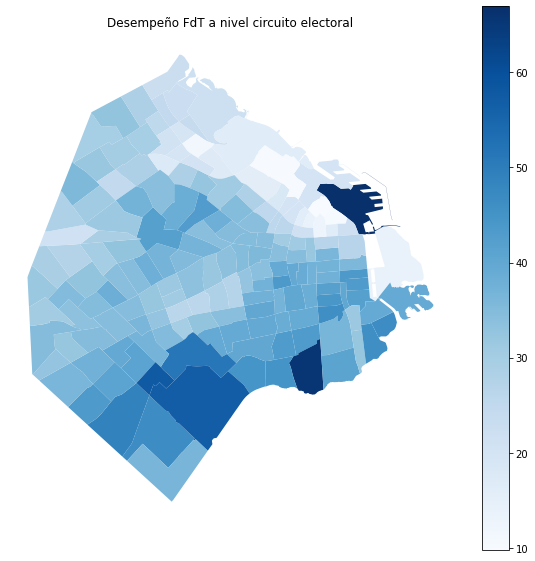

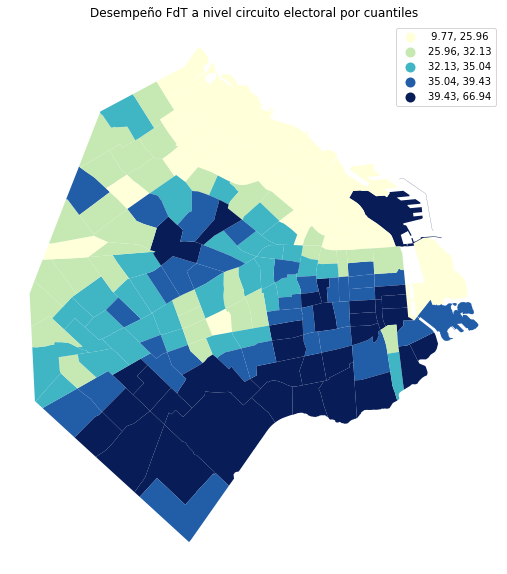

In [24]:
#Mapear

fdt_circuitos=df_circuitos_resultados.loc[df_circuitos_resultados.NOMBRE_AGRUPACION =="FRENTE DE TODOS",:]
mapa_resultadosfdt_circuitos= fdt_circuitos.plot(column="Porcentaje", cmap="Blues",figsize=(10, 10), legend=True)
mapa_resultadosfdt_circuitos.axis("off")
mapa_resultadosfdt_circuitos.set_title("Desempeño FdT a nivel circuito electoral")
plt.show()

#Mapa cuantiles
mapa_resultadosfdt_circuitos1= fdt_circuitos.plot(column="Porcentaje", cmap="YlGnBu",figsize=(10, 10), legend=True, scheme="quantiles")
mapa_resultadosfdt_circuitos1.axis("off")
mapa_resultadosfdt_circuitos1.set_title("Desempeño FdT a nivel circuito electoral por cuantiles")
plt.show()

Nuevamente, el análisis a nivel circuito electoral muestra que loscircuitos con mayor cantidad de votos que obtuvo el FdT son los circuitos de la zona Sur (mayoritariamente oeste), mientras que la parte noreste de la Ciudad reflejan el bajo caudal de votos hacia el partido.


## Situación en CABA: Necesidades Básicas Insatisfechas en números

Los datos del censo correspondiente al año 2010 del INDEC revelan que en la Ciudad Autónoma de Buenos Aires hay 68.776 hogares (casi el 6% del total) que tienen, al menos, una necesidad básica insatisfecha. ¿Cuáles son? En la actualidad, el INDEC identifica cinco necesidades como básicas, y considera como pobre a aquellos hogares que al menos poseen una de ellas.
- Vivienda de tipo inconveniente (vivienda de inquilinato, precaria u otro tipo)

- Viviendas sin cuarto de baño

- Hacinamiento critico (más de tres personas por cuarto)

- Hogares con niños en edad escolar (6 a 12 años) que no asisten a la escuela.

- Hogares con cuatro o más personas por miembro ocupado y en los cuales el jefe de hogar tiene bajo nivel de educación (dos años o menos en el nivel primario)

In [25]:
#Un value_counts para ver cuantos valores pertenecían a cada codificación.
df_nbi= pd.DataFrame(hogar_limpio.ALGUNBI.value_counts())
temp=df_nbi.rename(index={0:"Hogares sin NBI", 1:"Hogares con NBI", 2:"Sin clasificar"})
temp1=temp.rename_axis('Condicion').reset_index()
temp1["Porcentaje"]=(temp1['ALGUNBI'] / temp1['ALGUNBI'].sum()) * 100
temp1

,Condicion,ALGUNBI,Porcentaje
0,Hogares sin NBI,1081358,93.819099
1,Hogares con NBI,68776,5.967036
2,Sin clasificar,2465,0.213864


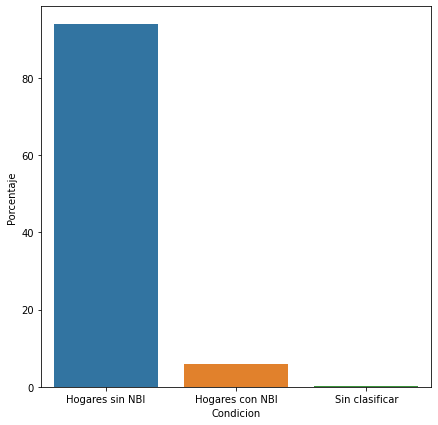

In [26]:
plt.figure(figsize=(7,7))
sns.barplot(data=temp1, x="Condicion", y="Porcentaje")
plt.show()

## Join entre radios y circuitos

In [27]:
#Ordeno 
caba_radios_censales=caba_radios_censales.sort_values(by=["DEPTO", "FRAC","RADIO"])

In [28]:
caba_circuitos.crs

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [29]:
caba_radios_censales.to_crs(caba_circuitos.crs, inplace=True)

In [30]:
#Join entre radios censales y circuitos CABA. Pero está mal
joinprueba=gpd.sjoin(caba_circuitos, caba_radios_censales, op="contains")
joinprueba.RADIO.value_counts()

C:\Users\W10\anaconda_act\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


06    193
03    182
05    177
04    177
07    174
02    171
08    148
09    130
01    108
10     82
11     63
12     33
13     11
14      4
15      3
19      3
18      3
16      3
17      2
20      1
23      1
Name: RADIO, dtype: int64

<AxesSubplot:>

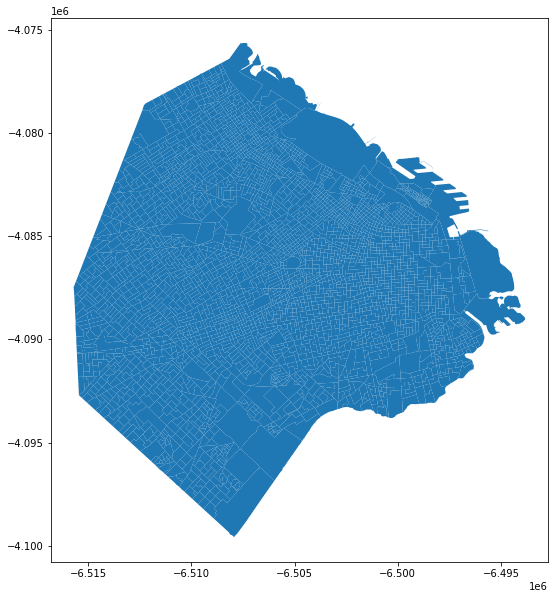

In [31]:
#MAPA RADIOS CENSALES
caba_radios_censales.plot(figsize=(10, 10))

### Merges hasta llegar a unir hogar con comuna para poder unir con shp de radio

In [32]:
#dejo de lado filas con codificacion NBI "2",  no nos sirve para el  análisis, además son un poco más de 2mil casos.
hogar_limpio=hogar_limpio.loc[hogar_limpio.ALGUNBI != 2]
hogar_limpio

,HOGAR_REF_ID,VIVIENDA_REF_ID,ALGUNBI
0,1,1,0
1,2,1,0
2,3,1,0
3,4,1,1
4,5,2,1
...,...,...,...
1152592,1152593,1426431,0
1152593,1152594,1426432,0
1152594,1152595,1426434,0
1152595,1152596,1426435,0


In [33]:
#Merge entre hogar y vivienda
vivienda_hogar=pd.merge(hogar_limpio, vivienda)
#me quedo con columnaas que me sirven
vivienda_hogar=vivienda_hogar.loc[:,["VIVIENDA_REF_ID", "ALGUNBI", "RADIO_REF_ID"]]
vivienda_hogar

,VIVIENDA_REF_ID,ALGUNBI,RADIO_REF_ID
0,1,0,1
1,1,0,1
2,1,0,1
3,1,1,1
4,2,1,1
...,...,...,...
1150129,1426431,0,3553
1150130,1426432,0,3553
1150131,1426434,0,3553
1150132,1426435,0,3553


In [34]:
#Mergeo y tengo nbi por radio
nbi_x_radio=pd.merge(vivienda_hogar, radio)
nbi_x_radio

,VIVIENDA_REF_ID,ALGUNBI,RADIO_REF_ID,FRAC_REF_ID,IDRADIO
0,1,0,1,1,1
1,1,0,1,1,1
2,1,0,1,1,1
3,1,1,1,1,1
4,2,1,1,1,1
...,...,...,...,...,...
1150129,1426431,0,3553,351,13
1150130,1426432,0,3553,351,13
1150131,1426434,0,3553,351,13
1150132,1426435,0,3553,351,13


In [35]:
#Merge con fracciones
nbi_frac=pd.merge(frac, nbi_x_radio)
nbi_frac

,FRAC_REF_ID,DPTO_REF_ID,IDFRAC,VIVIENDA_REF_ID,ALGUNBI,RADIO_REF_ID,IDRADIO
0,1,1,1,1,0,1,1
1,1,1,1,1,0,1,1
2,1,1,1,1,0,1,1
3,1,1,1,1,1,1,1
4,1,1,1,2,1,1,1
...,...,...,...,...,...,...,...
1150129,351,15,21,1426431,0,3553,13
1150130,351,15,21,1426432,0,3553,13
1150131,351,15,21,1426434,0,3553,13
1150132,351,15,21,1426435,0,3553,13


In [36]:
#Merge con comuna, ahora tengo nbi por radio y comuna.
nbi_radio_comuna=pd.merge(dpto, nbi_frac)
nbi_radio_comuna=nbi_radio_comuna.loc[:, ["DPTO_REF_ID", "NOMDPTO", "ALGUNBI", "RADIO_REF_ID","IDRADIO","IDFRAC"]]

#Agrupo.
prueba1=nbi_radio_comuna.groupby(["DPTO_REF_ID","IDRADIO","IDFRAC"], as_index=False)["ALGUNBI"].sum()

#Ordeno de la misma forma que el shp de radios.
prueba1=prueba1.sort_values(by=["DPTO_REF_ID", "IDFRAC","IDRADIO"])
prueba1

,DPTO_REF_ID,IDRADIO,IDFRAC,ALGUNBI
0,1,1,1,19
1,1,1,2,43
29,1,2,2,25
57,1,3,2,25
85,1,4,2,23
...,...,...,...,...
3499,15,9,21,2
3517,15,10,21,26
3531,15,11,21,6
3542,15,12,21,37


In [37]:
#Pero en radios censales la columna esta en formato string, asi que la pasamos a int
caba_radios_censales["DEPTO"] = pd.to_numeric(caba_radios_censales["DEPTO"],downcast="integer")
caba_radios_censales["FRAC"] = pd.to_numeric(caba_radios_censales["FRAC"],downcast="integer")
caba_radios_censales["RADIO"] = pd.to_numeric(caba_radios_censales["RADIO"],downcast="integer")
#Ordeno 
caba_radios_censales=caba_radios_censales.sort_values(by=["DEPTO", "FRAC","RADIO"])
caba_radios_censales.head()

,AREA,PERIMETER,PAIS0210_,PAIS0210_I,PROV,DEPTO,FRAC,RADIO,TIPO,LINK,VARONES,MUJERES,TOT_POB,HOGARES,VIV_PART,VIV_PART_H,geometry
655,1795471.00,14434.790,657,656,02,1,1,1,U,020010101,212.0,124.0,336.0,65.0,80.0,38.0,"POLYGON ((-6498197.944 -4082524.817, -6497497...."
640,27321.00,918.364,642,641,02,1,2,1,U,020010201,232.0,246.0,478.0,161.0,148.0,134.0,"POLYGON ((-6499588.336 -4082435.524, -6499584...."
647,17702.00,767.956,649,648,02,1,2,2,U,020010202,188.0,213.0,401.0,128.0,124.0,114.0,"POLYGON ((-6499731.437 -4082476.022, -6499744...."
675,10962.88,526.113,677,676,02,1,2,3,U,020010203,170.0,167.0,337.0,104.0,104.0,98.0,"POLYGON ((-6499503.382 -4082627.651, -6499477...."
645,136260.50,1822.664,647,646,02,1,2,4,U,020010204,297.0,305.0,602.0,163.0,120.0,110.0,"POLYGON ((-6499457.539 -4082460.120, -6499445...."


In [38]:
#Merge entre mis datos del censo y el shp de radios 
merge_nbi_radio=pd.merge(caba_radios_censales, prueba1, left_on=["DEPTO", "FRAC", "RADIO"], right_on=["DPTO_REF_ID", "IDFRAC", "IDRADIO"])
merge_nbi_radio.head()

,AREA,PERIMETER,PAIS0210_,PAIS0210_I,PROV,DEPTO,FRAC,RADIO,TIPO,LINK,...,MUJERES,TOT_POB,HOGARES,VIV_PART,VIV_PART_H,geometry,DPTO_REF_ID,IDRADIO,IDFRAC,ALGUNBI
0,1795471.00,14434.790,657,656,02,1,1,1,U,020010101,...,124.0,336.0,65.0,80.0,38.0,"POLYGON ((-6498197.944 -4082524.817, -6497497....",1,1,1,19
1,27321.00,918.364,642,641,02,1,2,1,U,020010201,...,246.0,478.0,161.0,148.0,134.0,"POLYGON ((-6499588.336 -4082435.524, -6499584....",1,1,2,43
2,17702.00,767.956,649,648,02,1,2,2,U,020010202,...,213.0,401.0,128.0,124.0,114.0,"POLYGON ((-6499731.437 -4082476.022, -6499744....",1,2,2,25
3,10962.88,526.113,677,676,02,1,2,3,U,020010203,...,167.0,337.0,104.0,104.0,98.0,"POLYGON ((-6499503.382 -4082627.651, -6499477....",1,3,2,25
4,136260.50,1822.664,647,646,02,1,2,4,U,020010204,...,305.0,602.0,163.0,120.0,110.0,"POLYGON ((-6499457.539 -4082460.120, -6499445....",1,4,2,23


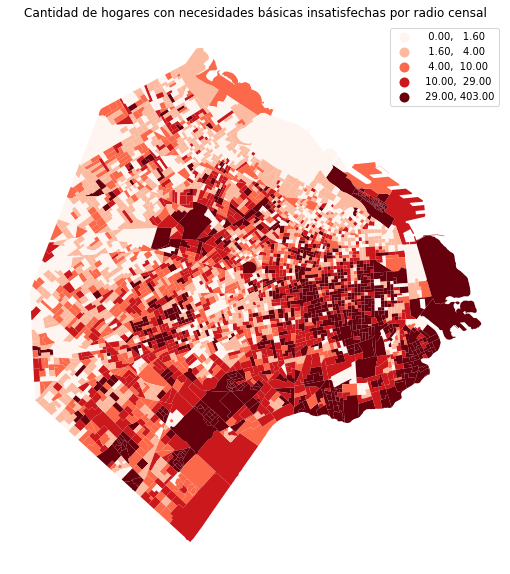

In [39]:
#Mapa de cantidad de hogares con NBI por radio censal.
mapa_nbi_radio=merge_nbi_radio.plot(column="ALGUNBI",  legend=True, cmap="Reds",figsize=(10,10),scheme="quantiles")
mapa_nbi_radio.axis("off")
mapa_nbi_radio.set_title("Cantidad de hogares con necesidades básicas insatisfechas por radio censal")
plt.show()

La cantidad de hogares con alguna necesidad básica insatisfecha por radio censal, ya muestra una tendencia de concentración en la parte sur de la ciudad.

## Ahora, toca analizarlo por circuito.

In [40]:
#Quiero obtener los centroides de los radios
merge_nbi_radio.centroid

0       POINT (-6497589.271 -4083599.748)
1       POINT (-6499609.554 -4082514.144)
2       POINT (-6499670.700 -4082590.788)
3       POINT (-6499444.448 -4082720.753)
4       POINT (-6499127.454 -4082700.256)
                      ...                
3549    POINT (-6504527.198 -4085354.976)
3550    POINT (-6504416.227 -4085247.993)
3551    POINT (-6504287.304 -4085152.778)
3552    POINT (-6504154.345 -4085065.292)
3553    POINT (-6503943.894 -4085016.371)
Length: 3554, dtype: geometry

In [41]:
#Hago una copia de mi dataframe de radios censales original
nbi_radio_centroides=merge_nbi_radio
#Reemplazo mi columna de geometria para que ahora tenga los centroides, no los polígonos.
nbi_radio_centroides["geometry"] = merge_nbi_radio.centroid
nbi_radio_centroides

,AREA,PERIMETER,PAIS0210_,PAIS0210_I,PROV,DEPTO,FRAC,RADIO,TIPO,LINK,...,MUJERES,TOT_POB,HOGARES,VIV_PART,VIV_PART_H,geometry,DPTO_REF_ID,IDRADIO,IDFRAC,ALGUNBI
0,1795471.00,14434.790,657,656,02,1,1,1,U,020010101,...,124.0,336.0,65.0,80.0,38.0,POINT (-6497589.271 -4083599.748),1,1,1,19
1,27321.00,918.364,642,641,02,1,2,1,U,020010201,...,246.0,478.0,161.0,148.0,134.0,POINT (-6499609.554 -4082514.144),1,1,2,43
2,17702.00,767.956,649,648,02,1,2,2,U,020010202,...,213.0,401.0,128.0,124.0,114.0,POINT (-6499670.700 -4082590.788),1,2,2,25
3,10962.88,526.113,677,676,02,1,2,3,U,020010203,...,167.0,337.0,104.0,104.0,98.0,POINT (-6499444.448 -4082720.753),1,3,2,25
4,136260.50,1822.664,647,646,02,1,2,4,U,020010204,...,305.0,602.0,163.0,120.0,110.0,POINT (-6499127.454 -4082700.256),1,4,2,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,19842.00,573.522,1361,1346,02,15,21,9,U,020152109,...,473.0,863.0,392.0,508.0,379.0,POINT (-6504527.198 -4085354.976),15,9,21,2
3550,16367.38,516.821,1330,1315,02,15,21,10,U,020152110,...,344.0,613.0,278.0,387.0,274.0,POINT (-6504416.227 -4085247.993),15,10,21,26
3551,17742.38,538.986,1301,1286,02,15,21,11,U,020152111,...,358.0,697.0,335.0,438.0,324.0,POINT (-6504287.304 -4085152.778),15,11,21,6
3552,20234.75,588.110,1274,1259,02,15,21,12,U,020152112,...,275.0,510.0,217.0,276.0,215.0,POINT (-6504154.345 -4085065.292),15,12,21,37


In [42]:
caba_circuitos.crs

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [43]:
nbi_radio_centroides.to_crs(caba_circuitos.crs, inplace=True)

In [44]:
#Uno radios con circuitos
join_espacial=gpd.sjoin(caba_circuitos, nbi_radio_centroides, op="contains")
join_espacial

C:\Users\W10\anaconda_act\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,distrito,provincia,departamen,cabecera,circuito,indec_p,indec_d,geometry,index_right,AREA,...,VARONES,MUJERES,TOT_POB,HOGARES,VIV_PART,VIV_PART_H,DPTO_REF_ID,IDRADIO,IDFRAC,ALGUNBI
0,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0003,02,001,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -...",160,14128.88,...,146.0,146.0,292.0,142.0,382.0,137.0,1,11,13,1
0,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0003,02,001,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -...",161,24952.88,...,150.0,142.0,292.0,138.0,250.0,138.0,1,12,13,0
0,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0003,02,001,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -...",159,231034.50,...,312.0,302.0,614.0,235.0,641.0,229.0,1,10,13,5
0,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0003,02,001,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -...",158,58873.75,...,211.0,215.0,426.0,157.0,251.0,154.0,1,9,13,2
0,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0003,02,001,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -...",163,3806721.00,...,1008.0,952.0,1960.0,659.0,855.0,561.0,1,14,13,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,01,Ciudad Autónoma de Buenos Aires,Comuna 8,Comuna 8,0088,02,008,"POLYGON Z ((-6509495.834 -4096454.887 0.000, -...",1809,75001.13,...,428.0,512.0,940.0,385.0,436.0,319.0,8,5,9,15
166,01,Ciudad Autónoma de Buenos Aires,Comuna 8,Comuna 8,0088,02,008,"POLYGON Z ((-6509495.834 -4096454.887 0.000, -...",1813,91852.50,...,418.0,504.0,922.0,315.0,328.0,291.0,8,9,9,14
166,01,Ciudad Autónoma de Buenos Aires,Comuna 8,Comuna 8,0088,02,008,"POLYGON Z ((-6509495.834 -4096454.887 0.000, -...",1808,75246.13,...,240.0,273.0,513.0,186.0,193.0,161.0,8,4,9,0
166,01,Ciudad Autónoma de Buenos Aires,Comuna 8,Comuna 8,0088,02,008,"POLYGON Z ((-6509495.834 -4096454.887 0.000, -...",1806,76206.25,...,418.0,465.0,883.0,298.0,319.0,272.0,8,2,9,6


In [45]:
#ESTE SERÍA EL DATAFRAME FINAL CON TODOS LOS DATOS UNIDOS
#Debo agrupar por circuito y uno con el que tiene resultados
nbi_geo_circuito=join_espacial.dissolve(by='circuito',aggfunc="sum")
test=nbi_geo_circuito.rename_axis('circuito').reset_index()
test=test.loc[:,["circuito", "geometry", "ALGUNBI"]]
resultado_x_circuito_fdt=resultado_x_circuito.loc[resultado_x_circuito.NOMBRE_AGRUPACION=="FRENTE DE TODOS",:]
DF_FINAL=pd.merge(test,resultado_x_circuito_fdt,left_on="circuito", right_on="CODIGO_CIRCUITO")
DF_FINAL

,circuito,geometry,ALGUNBI,CODIGO_CIRCUITO,NOMBRE_AGRUPACION,VOTOS_AGRUPACION,Porcentaje
0,0001,"POLYGON Z ((-6497250.245 -4088621.478 0.000, -...",345,0001,FRENTE DE TODOS,3002,42.062491
1,0002,"POLYGON Z ((-6498220.506 -4087556.212 0.000, -...",560,0002,FRENTE DE TODOS,2868,43.173265
2,0003,"POLYGON Z ((-6496281.209 -4084737.812 0.000, -...",185,0003,FRENTE DE TODOS,466,13.799230
3,0005,MULTIPOLYGON Z (((-6498813.171 -4082720.648 0....,2911,0005,FRENTE DE TODOS,3616,66.938171
4,0006,"POLYGON Z ((-6499715.749 -4084266.533 0.000, -...",121,0006,FRENTE DE TODOS,1150,10.351035
...,...,...,...,...,...,...,...
161,0163,"POLYGON Z ((-6505369.444 -4083878.729 0.000, -...",352,0163,FRENTE DE TODOS,4095,42.933529
162,0164,"POLYGON Z ((-6508330.097 -4084935.699 0.000, -...",433,0164,FRENTE DE TODOS,3329,38.467761
163,0165,"POLYGON Z ((-6508000.480 -4082165.877 0.000, -...",291,0165,FRENTE DE TODOS,5412,34.183931
164,0166,"POLYGON Z ((-6509488.487 -4084220.901 0.000, -...",85,0166,FRENTE DE TODOS,4893,37.135701


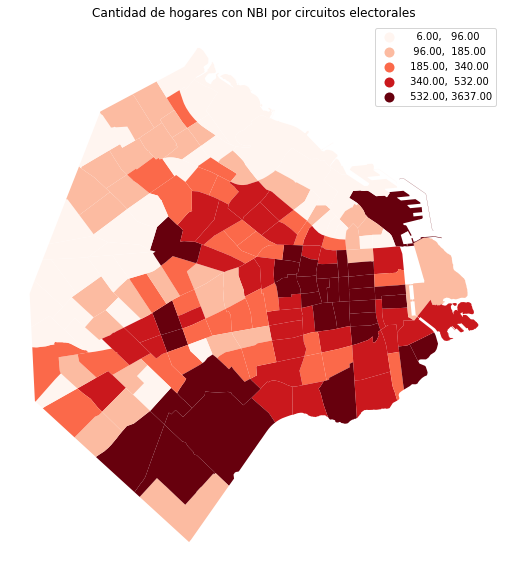

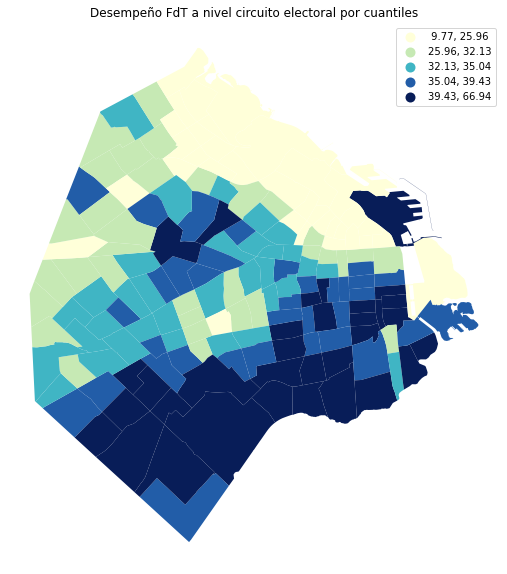

In [46]:
#Mapa de ALGUNBI
mapa_nbi_circuitos=DF_FINAL.plot(column="ALGUNBI", figsize=(10,10), cmap="Reds", scheme="quantiles",legend=True)
mapa_nbi_circuitos.axis("off")
mapa_nbi_circuitos.set_title("Cantidad de hogares con NBI por circuitos electorales")
plt.show()

#Traigo mi mapa de resultados por circuitos
mapa_resultadosfdt_circuitos1= DF_FINAL.plot(column="Porcentaje", cmap="YlGnBu",figsize=(10, 10), legend=True, scheme="quantiles")
mapa_resultadosfdt_circuitos1.axis("off")
mapa_resultadosfdt_circuitos1.set_title("Desempeño FdT a nivel circuito electoral por cuantiles")
plt.show()

## Análisis 

Puede verse una relación entre los hogares con necesidades básicas insatisfechas y el voto al FdT:
- En la parte sur de la ciudad vemos cómo el FdT obtuvo un alto porcentaje de votos y, a la vez, son los circuitos donde más se concentran los hogares con algún NBI.
- Inversamente, en la parte norte de CABA donde menos caudal de votos obtuvo la fórmula, es donde menos hogares con NBI hay. Incluso, en la parte noreste solo hay entre 6 y 96 hogares que tienen alguna necesidad básica sin cubrir. 


Esto nos da la pauta de que el Frente de Todos obtuvo un mejor resultado allí donde hay más necesidades básicas insatisfechas. 
Es posible que esto se deba a que la Ciudad de Buenos Aires es gobernada por figuras de Juntos por el Cambio desde el año 2007, sin atender ni poder solucionar las demandas y necesidades de los sectores más vulnerables. En este caso, los circuitos donde más necesidades insatisfechas hay, se inclinan por votar a lo que constituye la oposicion del gobierno porteño, manifestando el descontento hacia el gobierno actual y votando por la segunda fuerza. 